In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("household_power_consumption.txt", delimiter=';')
df.head()

<ipython-input-2-52ccb6fc1946>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("household_power_consumption.txt", delimiter=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df['datetime'] = pd.to_datetime(df['Date'] + " " + df['Time'], )
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1779472 entries, 0 to 1779471
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
 9   datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 135.8+ MB


In [5]:
df = df.fillna(method='ffill')

In [ ]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
1403859,17/8/2009,15:03:00,0.318,0.258,242.560,1.600,0.000,1.000,1.0,2009-08-17 15:03:00
1403860,17/8/2009,15:04:00,0.316,0.256,242.210,1.600,0.000,2.000,0.0,2009-08-17 15:04:00
1403861,17/8/2009,15:05:00,0.318,0.260,243.020,1.600,0.000,1.000,1.0,2009-08-17 15:05:00
1403862,17/8/2009,15:06:00,0.318,0.260,243.010,1.600,0.000,1.000,1.0,2009-08-17 15:06:00


In [6]:
df.set_index('datetime', inplace=True)

In [7]:
df = df.drop(columns=['Date', 'Time'])

In [8]:
df['Global_active_power'] = df['Global_active_power'].replace('?', 0)
df['Global_reactive_power'] = df['Global_reactive_power'].replace('?', 0)
df['Voltage'] = df['Voltage'].replace('?', 0)
df['Global_intensity'] = df['Global_intensity'].replace('?', 0)
df['Sub_metering_1'] = df['Sub_metering_1'].replace('?', 0)
df['Sub_metering_2'] = df['Sub_metering_2'].replace('?', 0)
df['Sub_metering_3'] = df['Sub_metering_3'].replace('?', 0)

In [10]:
# convert columns to float
df[['Global_active_power','Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1',
    'Sub_metering_2', 'Sub_metering_3']] = df[['Global_active_power', 'Global_reactive_power',
                                               'Voltage', 'Global_intensity',
                                               'Sub_metering_1', 'Sub_metering_2',
                                               'Sub_metering_3']].astype(float)

In [11]:
# resample
df = df.resample('D').sum()

In [12]:
# Rename columns
df.reset_index(inplace=True)
df = df.rename(columns={'Global_active_power': 'y', 'datetime': 'ds'})
# df = df.rename(columns={'Global_active_power': 'y'})

In [13]:
df1 = df[['y', 'ds']]

test_df = df1.iloc[-300:]
train_df = df1.iloc[:-300]

In [14]:
correlation = df['y'].corr(df['Voltage'])
correlation

0.7143540247870458

In [15]:
correlation2 = df['Voltage'].corr(df['Global_intensity'])
correlation2

0.7220123881522387

In [16]:
model =  Prophet()
model.fit(train_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbzqrp3qh/dgqjncs6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbzqrp3qh/gvbkk4c0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75682', 'data', 'file=/tmp/tmpbzqrp3qh/dgqjncs6.json', 'init=/tmp/tmpbzqrp3qh/gvbkk4c0.json', 'output', 'file=/tmp/tmpbzqrp3qh/prophet_model97w4m2y8/prophet_model-20231205205420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:54:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:54:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


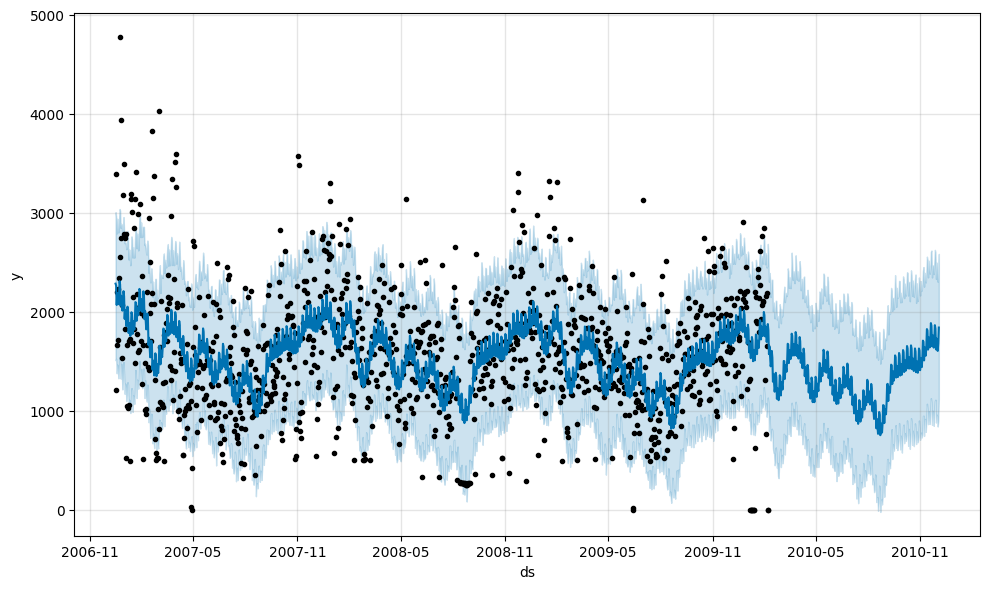

In [23]:
#predict for the next 10 months
future = model.make_future_dataframe(periods=300, freq='D')
forecast = model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries
model.plot(forecast)
plt.show()

In [18]:
from prophet.diagnostics import cross_validation
from sklearn.metrics import mean_absolute_error

In [35]:
# Calculate MAE
forecasted_val = forecast.iloc[-300:]
mae = mean_absolute_error(forecasted_val['yhat'], test_df['y'])

# Convert MAE to MAPE
mape = mae / df1['y'].abs().mean() * 100

# Print MAPE rounded to 2 decimal places
print(f'MAPE: {mape:.2f}%')

MAPE: 77.78%


In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming y_actual contains the actual values and y_predicted contains the predicted values
rmse = sqrt(mean_squared_error(forecasted_val['yhat'], test_df['y']))

# Print RMSE rounded to 2 decimal places
print(f'RMSE: {rmse:.2f}%')

RMSE: 1176.02%


In [34]:
test_df.dtypes

y            float64
ds    datetime64[ns]
dtype: object

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbzqrp3qh/iinm3da8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbzqrp3qh/puz5wvif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85295', 'data', 'file=/tmp/tmpbzqrp3qh/iinm3da8.json', 'init=/tmp/tmpbzqrp3qh/puz5wvif.json', 'output', 'file=/tmp/tmpbzqrp3qh/prophet_modelbuf_79dr/prophet_model-20231205211340.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:13:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:13:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


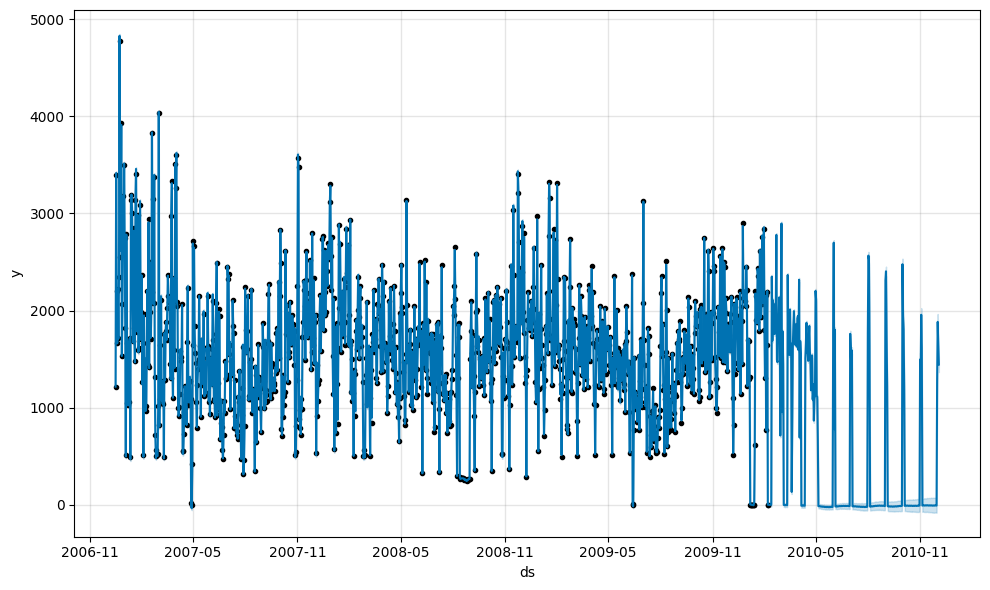

In [44]:
# Assuming df is your DataFrame and it has been split into train and test
train = df.iloc[:-300, :]
test = df.iloc[-300:, :]

# Initialize the model
model = Prophet()

# Initialize the model
model = Prophet()

# Add the regressors
model.add_regressor('Global_reactive_power')
model.add_regressor('Voltage')
model.add_regressor('Global_intensity')
model.add_regressor('Sub_metering_1')
model.add_regressor('Sub_metering_2')
model.add_regressor('Sub_metering_3')

# Fit the model
model.fit(train)

# Make future dataframe
future = model.make_future_dataframe(periods=300, freq='D')

# Add regressors to future dataframe
future['Global_reactive_power'] = df['Global_reactive_power']
future['Voltage'] = df['Voltage']
future['Global_intensity'] = df['Global_intensity']
future['Sub_metering_1'] = df['Sub_metering_1']
future['Sub_metering_2'] = df['Sub_metering_2']
future['Sub_metering_3'] = df['Sub_metering_3']

# Predict
forecast = model.predict(future)

model.plot(forecast)
plt.show()

In [45]:
# Calculate MAE
forecasted_val = forecast.iloc[-300:]
mae = mean_absolute_error(forecasted_val['yhat'], test['y'])

# Convert MAE to MAPE
mape = mae / df1['y'].abs().mean() * 100

# Print MAPE rounded to 2 decimal places
print(f'MAPE: {mape:.2f}%')

MAPE: 0.83%


In [46]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming y_actual contains the actual values and y_predicted contains the predicted values
rmse = sqrt(mean_squared_error(forecasted_val['yhat'], test_df['y']))

# Print RMSE rounded to 2 decimal places
print(f'RMSE: {rmse:.2f}%')

RMSE: 13.24%
